In [2]:
import pandas as pd
import textdistance
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
from itertools import combinations

#    Experiments:

#    1 - no prompt typewriter
#    2 - no prompt all
#    3 - prompt typewriter
#    4 - prompt all
###

In [49]:
#### Takes in a dataset of repeated measures and does the stats on the selected columns
def statprint(df, keylist):
    #descriptive statistics
    print("C", "Mean", "Std")
    for k in keylist: 
        print(k, round(stats.tmean(df[k]),3), round(stats.tstd(df[k]),3))
    print("-----------")
    
    normalities = {}
    allnormal = True

    sets = []
    for k in keylist:
        sets.append(df[k])
    
    for k in keylist:
        normalities[k] = stats.normaltest(df[k]).pvalue
        if normalities[k] < 0.05:
            allnormal=False
        #print(stats.normaltest(df[k])) #normal p>0.05
    
    #anova or friedman?
    if len(keylist)>=3:
        if allnormal:
            toprint = "ANOVA "
            stat = stats.f_oneway(*sets)
        else:
            toprint = "FRIEDMAN "
            stat = stats.friedmanchisquare(*sets)
            
        print(toprint+str(round(stat.statistic, 3)) + ", p="+str(round(stat.pvalue,3)))
        print("-----------")
    
    if len(keylist)<3 or stat.pvalue<0.05: # go to paired tests
    
        #paired sample tests
        
        combos = list(combinations(keylist, 2))
        padj = 0.05/len(combos)
        
        for combo in combos:
            if normalities[combo[0]]>0.05 and normalities[combo[1]]>0.05:
                stat = stats.ttest_rel(df[combo[0]],df[combo[1]])
                toprint = "T-test "
                toprint += "("+str(combo[0]) +", "+ str(combo[1]) + "): t="+ str(round(stat.statistic, 3)) + ", p="+str(round(stat.pvalue,3))
            else:
                stat = stats.wilcoxon(df[combo[0]],df[combo[1]], method='approx')
                toprint = "Wilcoxon "
                toprint += "("+str(combo[0]) +", "+ str(combo[1]) + "): Z="+ str(round(stat.zstatistic, 3)) + ", p="+str(round(stat.pvalue,3))
            
            
            
            if stat.pvalue<padj:
                toprint+=" *"
            print(toprint)
        
        print ("bf-adj p:", round(0.05/len(combos),4))

In [67]:
data = pd.read_csv('sugg_sim_2.csv')
data.head(5)

pid  WPM_NS_EXP  WPM_NS_FAM  WPM_NS_NOV  WPM_S_EXP  WPM_S_FAM  WPM_S_NOV  \
0  101   20.954315   19.548897   13.668448  19.273351  18.069236  14.032178   
1  104   19.406524   17.825395   13.074393  18.139320  17.328003  13.501120   
2  105   18.203097   16.897683   12.228599  15.598723  14.379085  11.834708   
3  106   19.421497   17.997143   12.845823  18.647750  17.700989  13.877047   
4  107   19.330493   16.978895   13.412191  17.418598  17.194293  13.081700   

   KSPC_NS_EXP  KSPC_NS_FAM  KSPC_NS_NOV  KSPC_S_EXP  KSPC_S_FAM  KSPC_S_NOV  \
0     1.017081     1.013638     1.015729    0.858577    0.856820    0.860743   
1     1.002448     1.001667     1.000000    0.848077    0.841689    0.842061   
2     1.065298     1.068853     1.061411    0.905511    0.907607    0.905211   
3     1.002235     1.002779     1.002148    0.844897    0.844741    0.841767   
4     1.006926     1.012293     1.005103    0.853991    0.845886    0.854627   

   CLUS_NS_EXP  CLUS_NS_FAM  CLUS_NS_NOV  CLUS_S_EXP  CLUS_S_FAM  CLUS_S_NOV  
0           26            3            1          20          14           5  
1           26            5            1          19           9           4  
2           26            3            2          21           5           5  
3           26            4            3          19           9           4  
4           26            2            1          19          11           6

Index(['pid', 'WPM_NS_EXP', 'WPM_NS_FAM', 'WPM_NS_NOV', 'WPM_S_EXP',
       'WPM_S_FAM', 'WPM_S_NOV', 'KSPC_NS_EXP', 'KSPC_NS_FAM', 'KSPC_NS_NOV',
       'KSPC_S_EXP', 'KSPC_S_FAM', 'KSPC_S_NOV', 'CLUS_NS_EXP', 'CLUS_NS_FAM',
       'CLUS_NS_NOV', 'CLUS_S_EXP', 'CLUS_S_FAM', 'CLUS_S_NOV'],
      dtype='object')


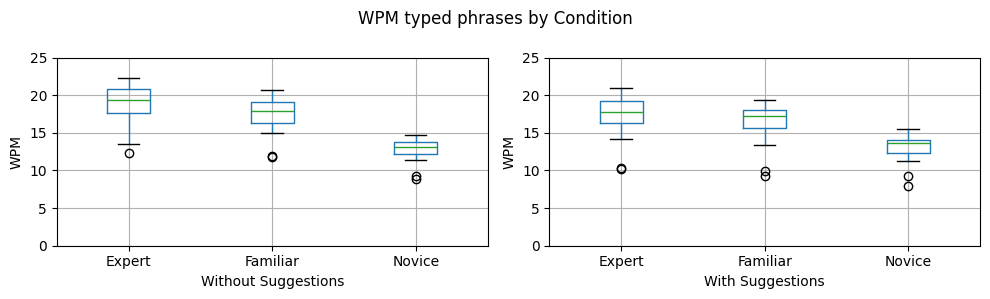

In [54]:
print (data.columns)
fields = list(data.columns)[1:7]
labels = ['Expert', 'Familiar', 'Novice']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()

fig.suptitle("WPM typed phrases by Condition")
data.boxplot(fields[0:3], ax=axes[0])
axes[0].set_xticklabels(labels)
axes[0].set_ylabel('WPM')
axes[0].set_xlabel('Without Suggestions')
data.boxplot(fields[3:], ax=axes[1])
axes[1].set_xticklabels(labels)
axes[1].set_ylabel('WPM')
axes[1].set_xlabel('With Suggestions')

axes[0].set_ylim(0,25)
axes[1].set_ylim(0,25)

plt.tight_layout()
plt.show()

In [41]:
fields = list(data.columns)[1:4]
print(fields)
statprint(data, fields)

['WPM_NS_EXP', 'WPM_NS_FAM', 'WPM_NS_NOV']
C Mean Std
WPM_NS_EXP 18.96 2.39
WPM_NS_FAM 17.49 2.176
WPM_NS_NOV 12.854 1.369
-----------
FRIEDMAN 60.0, p=0.0
-----------
Wilcoxon (WPM_NS_EXP, WPM_NS_FAM): Z=-4.782, p=0.0 *
Wilcoxon (WPM_NS_EXP, WPM_NS_NOV): Z=-4.782, p=0.0 *
Wilcoxon (WPM_NS_FAM, WPM_NS_NOV): Z=-4.782, p=0.0 *
bf-adj p: 0.0167


In [42]:
fields = list(data.columns)[4:7]
print(fields)
statprint(data, fields)

['WPM_S_EXP', 'WPM_S_FAM', 'WPM_S_NOV']
C Mean Std
WPM_S_EXP 17.407 2.6
WPM_S_FAM 16.488 2.436
WPM_S_NOV 13.116 1.63
-----------
FRIEDMAN 56.267, p=0.0
-----------
Wilcoxon (WPM_S_EXP, WPM_S_FAM): Z=-4.576, p=0.0 *
Wilcoxon (WPM_S_EXP, WPM_S_NOV): Z=-4.782, p=0.0 *
Wilcoxon (WPM_S_FAM, WPM_S_NOV): Z=-4.782, p=0.0 *
bf-adj p: 0.0167


In [51]:
fields = ['WPM_NS_EXP', 'WPM_S_EXP']
statprint(data, fields)
fields = ['WPM_NS_FAM', 'WPM_S_FAM']
statprint(data, fields)
fields = ['WPM_NS_NOV', 'WPM_S_NOV']
statprint(data, fields)

C Mean Std
WPM_NS_EXP 18.96 2.39
WPM_S_EXP 17.407 2.6
-----------
Wilcoxon (WPM_NS_EXP, WPM_S_EXP): Z=-4.762, p=0.0 *
bf-adj p: 0.05
C Mean Std
WPM_NS_FAM 17.49 2.176
WPM_S_FAM 16.488 2.436
-----------
Wilcoxon (WPM_NS_FAM, WPM_S_FAM): Z=-4.72, p=0.0 *
bf-adj p: 0.05
C Mean Std
WPM_NS_NOV 12.854 1.369
WPM_S_NOV 13.116 1.63
-----------
Wilcoxon (WPM_NS_NOV, WPM_S_NOV): Z=-2.417, p=0.016 *
bf-adj p: 0.05


In [52]:
fields = ['KSPC_NS_EXP', 'KSPC_S_EXP']
statprint(data, fields)
fields = ['KSPC_NS_FAM', 'KSPC_S_FAM']
statprint(data, fields)
fields = ['KSPC_NS_NOV', 'KSPC_S_NOV']
statprint(data, fields)

C Mean Std
KSPC_NS_EXP 1.028 0.055
KSPC_S_EXP 0.871 0.053
-----------
Wilcoxon (KSPC_NS_EXP, KSPC_S_EXP): Z=-4.782, p=0.0 *
bf-adj p: 0.05
C Mean Std
KSPC_NS_FAM 1.03 0.065
KSPC_S_FAM 0.873 0.06
-----------
Wilcoxon (KSPC_NS_FAM, KSPC_S_FAM): Z=-4.782, p=0.0 *
bf-adj p: 0.05
C Mean Std
KSPC_NS_NOV 1.025 0.057
KSPC_S_NOV 0.869 0.048
-----------
Wilcoxon (KSPC_NS_NOV, KSPC_S_NOV): Z=-4.782, p=0.0 *
bf-adj p: 0.05


Index(['pid', 'WPM_NS_EXP', 'WPM_NS_FAM', 'WPM_NS_NOV', 'WPM_S_EXP',
       'WPM_S_FAM', 'WPM_S_NOV', 'KSPC_NS_EXP', 'KSPC_NS_FAM', 'KSPC_NS_NOV',
       'KSPC_S_EXP', 'KSPC_S_FAM', 'KSPC_S_NOV', 'CLUS_NS_EXP', 'CLUS_NS_FAM',
       'CLUS_NS_NOV', 'CLUS_S_EXP', 'CLUS_S_FAM', 'CLUS_S_NOV'],
      dtype='object')


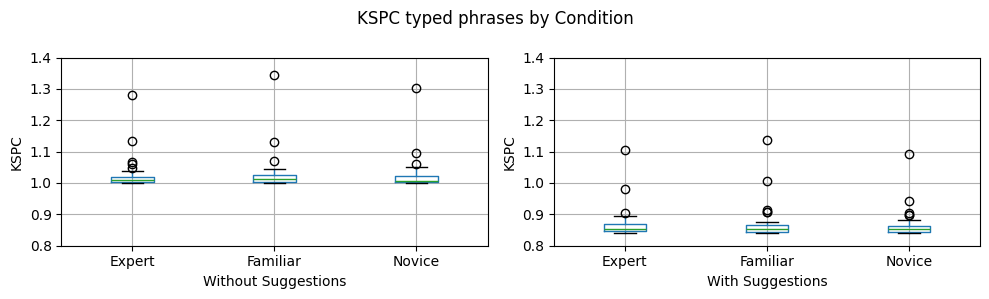

In [57]:
print (data.columns)
fields = list(data.columns)[7:13]
labels = ['Expert', 'Familiar', 'Novice']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()

fig.suptitle("KSPC typed phrases by Condition")
data.boxplot(fields[0:3], ax=axes[0])
axes[0].set_xticklabels(labels)
axes[0].set_ylabel('KSPC')
axes[0].set_xlabel('Without Suggestions')
data.boxplot(fields[3:], ax=axes[1])
axes[1].set_xticklabels(labels)
axes[1].set_ylabel('KSPC')
axes[1].set_xlabel('With Suggestions')

axes[0].set_ylim(0.8,1.4)
axes[1].set_ylim(0.8,1.4)

plt.tight_layout()
plt.show()

In [58]:
fields = list(data.columns)[7:10]
print(fields)
statprint(data, fields)

['KSPC_NS_EXP', 'KSPC_NS_FAM', 'KSPC_NS_NOV']
C Mean Std
KSPC_NS_EXP 1.028 0.055
KSPC_NS_FAM 1.03 0.065
KSPC_NS_NOV 1.025 0.057
-----------
FRIEDMAN 5.357, p=0.069
-----------


In [60]:
fields = list(data.columns)[10:13]
print(fields)
statprint(data, fields)

['KSPC_S_EXP', 'KSPC_S_FAM', 'KSPC_S_NOV']
C Mean Std
KSPC_S_EXP 0.871 0.053
KSPC_S_FAM 0.873 0.06
KSPC_S_NOV 0.869 0.048
-----------
FRIEDMAN 2.737, p=0.255
-----------


Index(['pid', 'WPM_NS_EXP', 'WPM_NS_FAM', 'WPM_NS_NOV', 'WPM_S_EXP',
       'WPM_S_FAM', 'WPM_S_NOV', 'KSPC_NS_EXP', 'KSPC_NS_FAM', 'KSPC_NS_NOV',
       'KSPC_S_EXP', 'KSPC_S_FAM', 'KSPC_S_NOV', 'CLUS_NS_EXP', 'CLUS_NS_FAM',
       'CLUS_NS_NOV', 'CLUS_S_EXP', 'CLUS_S_FAM', 'CLUS_S_NOV'],
      dtype='object')


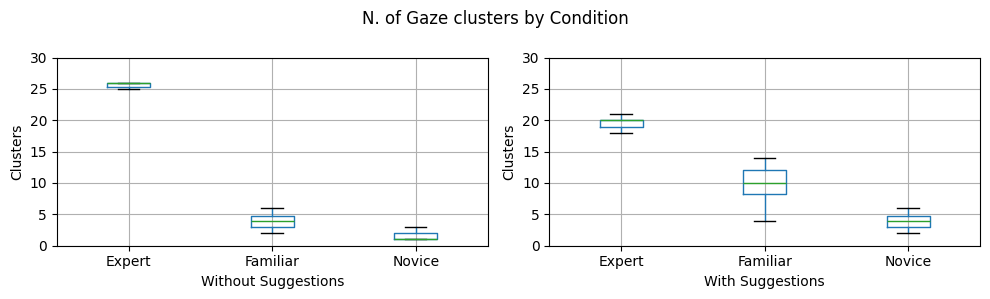

In [68]:
print (data.columns)
fields = list(data.columns)[13:]
labels = ['Expert', 'Familiar', 'Novice']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()

fig.suptitle("N. of Gaze clusters by Condition")
data.boxplot(fields[0:3], ax=axes[0])
axes[0].set_xticklabels(labels)
axes[0].set_ylabel('Clusters')
axes[0].set_xlabel('Without Suggestions')
data.boxplot(fields[3:], ax=axes[1])
axes[1].set_xticklabels(labels)
axes[1].set_ylabel('Clusters')
axes[1].set_xlabel('With Suggestions')

axes[0].set_ylim(0,30)
axes[1].set_ylim(0,30)

plt.tight_layout()
plt.show()

In [65]:
fields = list(data.columns)[13:16]
print(fields)
statprint(data, fields)

['CLUS_NS_EXP', 'CLUS_NS_FAM', 'CLUS_NS_NOV']
C Mean Std
CLUS_NS_EXP 25.733 0.45
CLUS_NS_FAM 3.733 1.311
CLUS_NS_NOV 1.467 0.681
-----------
FRIEDMAN 58.207, p=0.0
-----------
Wilcoxon (CLUS_NS_EXP, CLUS_NS_FAM): Z=-4.811, p=0.0 *
Wilcoxon (CLUS_NS_EXP, CLUS_NS_NOV): Z=-4.883, p=0.0 *
Wilcoxon (CLUS_NS_FAM, CLUS_NS_NOV): Z=-4.485, p=0.0 *
bf-adj p: 0.0167


In [69]:
fields = list(data.columns)[16:]
print(fields)
statprint(data, fields)

['CLUS_S_EXP', 'CLUS_S_FAM', 'CLUS_S_NOV']
C Mean Std
CLUS_S_EXP 19.733 0.868
CLUS_S_FAM 9.767 2.501
CLUS_S_NOV 3.833 1.177
-----------
ANOVA 692.263, p=0.0
-----------
T-test (CLUS_S_EXP, CLUS_S_FAM): t=18.557, p=0.0 *
T-test (CLUS_S_EXP, CLUS_S_NOV): t=50.958, p=0.0 *
T-test (CLUS_S_FAM, CLUS_S_NOV): t=11.697, p=0.0 *
bf-adj p: 0.0167


In [3]:
#### KEYBOARD METRICS #####

In [4]:
#### prepare the data 

In [5]:
participants = pd.read_csv('participants.csv')
events = pd.read_csv('events.csv')
phrases = pd.read_csv('phrases.csv')
participants

pid  age english gender fingers                   ts
0    id0b3b44e2cef4d   24      B2      m       t  2024-07-08 12:33:10
1    id0bdef54858cd3   23       u      m      tt  2024-07-09 11:36:24
2    id15d11dd8fd8aa   23      C2      m      tt  2024-07-09 16:22:34
3    id1d7694116bf3a   28      C2      m       t  2024-07-08 16:31:07
4   id3375326df78648   33      C2      m       i  2024-07-05 14:12:00
5    id3d3533f2ad9f7   25      C1      m      tt  2024-07-08 17:47:40
6    id4800804c0a8bb   22      C2      m      tt  2024-07-09 12:33:43
7    id485d6e97579b2   25      C1      m       i  2024-07-05 14:11:46
8    id5098c7343d768   27      C1      f      tt  2024-07-05 14:23:25
9   id617cb828677308   24      C2      m      tt  2024-07-08 10:30:25
10   id88d9599e3704f   21      C2      m      tt  2024-07-08 14:08:23
11   id93df3a2b5de79   29      C1      f       i  2024-07-05 18:48:58
12    id95955346653c   25      C2      m      tt  2024-07-08 18:44:36
13   id9bd6a4957c10c   40      C2      f      tt  2024-07-08 17:07:39
14   ida8cf5ca5e993a   21      C2      m      tt  2024-07-09 11:12:09
15   ida90f5cd2503a7   25      C1      m      tt  2024-07-08 18:19:43
16   idb53ee7b1425ce   22      C2      m      tt  2024-07-09 17:38:05
17   idbad99ed7a2a12   23      C2      m       t  2024-07-09 12:06:42
18   idff8add4b82d27   23      B2      m      tt  2024-07-08 11:52:53

In [6]:
#find participants with incomplete phrase sets
phrases.groupby('pid').count()

id  extype  orig_phrase  sub_phrase  effect
pid                                                         
id0b3b44e2cef4d  40      40           40          40      40
id0bdef54858cd3  40      40           40          40      40
id15d11dd8fd8aa  40      40           40          40      40
id1d7694116bf3a  40      40           40          40      40
id3d3533f2ad9f7  40      40           40          40      40
id4800804c0a8bb  40      40           40          40      40
id485d6e97579b2  40      40           40          40      40
id88d9599e3704f  40      40           40          40      40
id95955346653c   40      40           40          40      40
id9bd6a4957c10c  40      40           40          40      40
ida8cf5ca5e993a  20      20           20          20      20
ida90f5cd2503a7  40      40           40          40      40
idb53ee7b1425ce  40      40           40          40      40
idbad99ed7a2a12  40      40           40          40      40

In [7]:
#remove them from all data
pindex = phrases[phrases['pid']=='ida8cf5ca5e993a'].index
phrases.drop(pindex , inplace=True)
pindex = participants[participants['pid']=='ida8cf5ca5e993a'].index
participants.drop(pindex , inplace=True)
pindex = events[events['pid']=='ida8cf5ca5e993a'].index
events.drop(pindex , inplace=True)
phrases.groupby('pid').count()

id  extype  orig_phrase  sub_phrase  effect
pid                                                         
id0b3b44e2cef4d  40      40           40          40      40
id0bdef54858cd3  40      40           40          40      40
id15d11dd8fd8aa  40      40           40          40      40
id1d7694116bf3a  40      40           40          40      40
id3d3533f2ad9f7  40      40           40          40      40
id4800804c0a8bb  40      40           40          40      40
id485d6e97579b2  40      40           40          40      40
id88d9599e3704f  40      40           40          40      40
id95955346653c   40      40           40          40      40
id9bd6a4957c10c  40      40           40          40      40
ida90f5cd2503a7  40      40           40          40      40
idb53ee7b1425ce  40      40           40          40      40
idbad99ed7a2a12  40      40           40          40      40

In [8]:
p_participants = phrases.groupby('pid').count()
p_participants.join(participants.set_index('pid'), on='pid').groupby('english').count()

id  extype  orig_phrase  sub_phrase  effect  age  gender  fingers  ts
english                                                                       
B2        1       1            1           1       1    1       1        1   1
C1        3       3            3           3       3    3       3        3   3
C2        8       8            8           8       8    8       8        8   8
u         1       1            1           1       1    1       1        1   1

In [9]:
phrases

id              pid  extype  \
0      1  id485d6e97579b2       4   
1      2  id485d6e97579b2       4   
2      3  id485d6e97579b2       4   
3      4  id485d6e97579b2       4   
4      5  id485d6e97579b2       4   
..   ...              ...     ...   
535  541  idb53ee7b1425ce       4   
536  542  idb53ee7b1425ce       4   
537  543  idb53ee7b1425ce       4   
538  544  idb53ee7b1425ce       4   
539  545  idb53ee7b1425ce       4   

                                          orig_phrase  \
0                                Travis is in charge.   
1                       Pressure to finish my review!   
2              What do you think about Tracy and Jim?   
3      He doesn't want to give the trading positions.   
4                          I have forwarded to Kelly.   
..                                                ...   
535                    Probably can handle Monday PM.   
536       I didn't understand we were borrowing them.   
537                                   I'm still here.   
538                              What is up with ENE?   
539  Also it appears no payment is required tomorrow.   

                                        sub_phrase  effect  
0                                           Trivis       0  
1                   Pressure to finish your review       0  
2           What do you think about Tracy and Jim        0  
3                          He doesnt want to give        0  
4                        I have forwared to Kelly        0  
..                                             ...     ...  
535                 Probably can handle Monday PM.       0  
536    I didn't understand we were borrowing them.       0  
537                                I'm still here.       0  
538                           What is up with ENE?       0  
539  Also is appeared no payment required tomorrow       0  

[520 rows x 6 columns]

In [10]:
def cleanstr(string):
    string = string.lower()
    string = string.strip()
    #string = ''.join(letter for letter in string if letter.isalnum())
    string = re.sub(r"[!#\"$%&'()*+,-./:;<=>?@[\]^_`{|}~]", '', string)
    return string
    
phrases['orig_clean'] = phrases['orig_phrase'].apply(cleanstr)
phrases['sub_phrase_clean'] = phrases['sub_phrase'].apply(cleanstr)
phrases['ldist']=phrases.apply(lambda x: textdistance.levenshtein.distance(x['orig_clean'], x['sub_phrase_clean']), axis=1)

phrases.groupby('extype')['ldist'].mean()

extype
1    0.961538
2    1.530769
3    1.123077
4    1.638462
Name: ldist, dtype: float64

In [11]:
# What is the MSD per condition (i.e. accuracy of submitted phrases)
ptest = phrases[['pid','extype','ldist']].groupby(['pid','extype']).mean()
ptest.reset_index(inplace=True)
ptest.head(5)

pid  extype  ldist
0  id0b3b44e2cef4d       1    3.1
1  id0b3b44e2cef4d       2    1.9
2  id0b3b44e2cef4d       3    4.9
3  id0b3b44e2cef4d       4    5.4
4  id0bdef54858cd3       1    2.0

In [12]:
ptest=ptest.pivot(index='pid', columns ='extype', values='ldist')
ptest.reset_index(inplace=True)
ptest.head(5)

extype              pid    1    2    3    4
0       id0b3b44e2cef4d  3.1  1.9  4.9  5.4
1       id0bdef54858cd3  2.0  2.5  0.2  0.0
2       id15d11dd8fd8aa  0.0  0.0  0.2  0.3
3       id1d7694116bf3a  0.1  2.1  0.4  1.6
4       id3d3533f2ad9f7  1.1  0.9  1.0  0.0

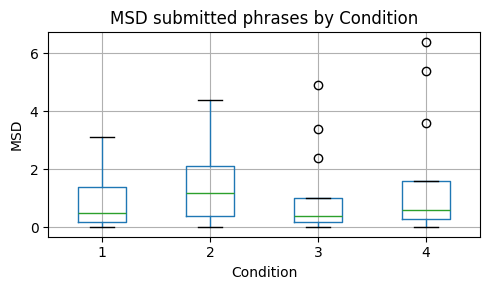

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
ptest.boxplot([1,2,3,4], ax=ax0)#[0])
plt.title("MSD submitted phrases by Condition")
ax0.set_xticklabels(['B-E', 'B', 'L-E', 'L'])
ax0.set_ylabel('MSD')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.show()

In [37]:
statprint(ptest, [1,2,3,4])

C Mean Std
1 0.9615384615384615 0.9836483632701793
2 1.5307692307692309 1.424420709964005
3 1.123076923076923 1.5161100697474916
4 1.6384615384615384 2.126240211240827
-----------
FRIEDMAN 2.592, p=0.4589
-----------


In [38]:
# MSD is not statistically significantly different across any condition

In [39]:
##### Backspace count #####

In [40]:
events.head(2)

id              pid                phrase event data  \
0   1  id485d6e97579b2  Travis is in charge.    KP    T   
1   2  id485d6e97579b2  Travis is in charge.    KP  NaN   

                   itype                       ts  extype  effect  \
0             insertText  2024-07-05 14:14:02.619       4       0   
1  deleteContentBackward  2024-07-05 14:14:08.379       4       0   

         tsunix  
0  1.720178e+09  
1  1.720178e+09

In [41]:
events.groupby('itype').count()

id    pid  phrase  event   data     ts  extype  \
itype                                                                      
deleteContentBackward    915    915     915    915      0    915     915   
deleteWordBackward         3      3       3      3      0      3       3   
insertText             14335  14335   14335  14335  14335  14335   14335   

                       effect  tsunix  
itype                                  
deleteContentBackward     915     915  
deleteWordBackward          3       3  
insertText              14335   14335

In [42]:
etest = events[events['itype']=='deleteContentBackward'][['pid','extype','id']].groupby(['pid', 'extype']).count()
etest.reset_index(inplace=True)
etest.head(5)

pid  extype  id
0  id0b3b44e2cef4d       1   5
1  id0b3b44e2cef4d       2   8
2  id0b3b44e2cef4d       3   9
3  id0b3b44e2cef4d       4   5
4  id0bdef54858cd3       1   7

In [43]:
etest=etest.pivot(index='pid', columns ='extype', values='id')
etest.reset_index(inplace=True)
etest.head(5)

extype              pid   1   2   3   4
0       id0b3b44e2cef4d   5   8   9   5
1       id0bdef54858cd3   7  29  12  19
2       id15d11dd8fd8aa  18  17  15  25
3       id1d7694116bf3a   6  13  14  29
4       id3d3533f2ad9f7  14  35  11  12

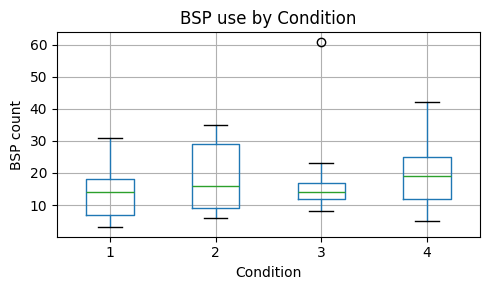

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
etest.boxplot([1,2,3,4], ax=ax0)#[0])
plt.title("BSP use by Condition")
ax0.set_xticklabels(['B-E', 'B', 'L-E', 'L'])

ax0.set_ylabel('BSP count')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.show()

In [45]:
statprint(etest, [1,2,3,4])

C Mean Std
1 14.23076923076923 8.4769672854727
2 18.153846153846153 10.753651735156094
3 17.846153846153847 13.53911711699446
4 20.153846153846153 9.956958654178777
-----------
FRIEDMAN 4.8898, p=0.18
-----------


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [46]:
# Backspace use is not statistically significantly different across any condition

In [47]:
##### WPM test ######


In [48]:
events.head(3)

id              pid                phrase event data  \
0   1  id485d6e97579b2  Travis is in charge.    KP    T   
1   2  id485d6e97579b2  Travis is in charge.    KP  NaN   
2   3  id485d6e97579b2  Travis is in charge.    KP    T   

                   itype                       ts  extype  effect  \
0             insertText  2024-07-05 14:14:02.619       4       0   
1  deleteContentBackward  2024-07-05 14:14:08.379       4       0   
2             insertText  2024-07-05 14:14:10.651       4       0   

         tsunix  
0  1.720178e+09  
1  1.720178e+09  
2  1.720178e+09

In [49]:
evmin = events[['pid','extype','phrase', 'ts', 'tsunix']].groupby(['pid','extype','phrase']).min()
evmin.reset_index(inplace=True)
evmin.head(5)

pid  extype                        phrase  \
0  id0b3b44e2cef4d       1          Can we meet at 3:30?   
1  id0b3b44e2cef4d       1  Can you bring these to 49C1?   
2  id0b3b44e2cef4d       1             Daniel A. Muschar   
3  id0b3b44e2cef4d       1       Did you differ from me?   
4  id0b3b44e2cef4d       1            I am trying again.   

                        ts        tsunix  
0  2024-07-08 12:46:22.324  1.720432e+09  
1  2024-07-08 12:45:27.029  1.720432e+09  
2  2024-07-08 12:45:15.493  1.720432e+09  
3  2024-07-08 12:46:52.308  1.720432e+09  
4  2024-07-08 12:47:03.844  1.720432e+09

In [50]:
evmax = events[['pid','extype','phrase', 'ts', 'tsunix']].groupby(['pid','extype','phrase']).max()
evmax.reset_index(inplace=True)
evmax.head(5)

pid  extype                        phrase  \
0  id0b3b44e2cef4d       1          Can we meet at 3:30?   
1  id0b3b44e2cef4d       1  Can you bring these to 49C1?   
2  id0b3b44e2cef4d       1             Daniel A. Muschar   
3  id0b3b44e2cef4d       1       Did you differ from me?   
4  id0b3b44e2cef4d       1            I am trying again.   

                        ts        tsunix  
0  2024-07-08 12:46:33.412  1.720432e+09  
1  2024-07-08 12:45:31.093  1.720432e+09  
2  2024-07-08 12:45:19.893  1.720432e+09  
3  2024-07-08 12:46:57.732  1.720432e+09  
4  2024-07-08 12:47:07.331  1.720432e+09

In [51]:
evjoin = evmin.set_index(['pid','extype','phrase']).join(evmax.set_index(['pid','extype','phrase']), lsuffix='_min', rsuffix='_max')
evjoin.reset_index(inplace=True)
evjoin['diff'] = evjoin['tsunix_max']-evjoin['tsunix_min']
evjoin.rename(columns={"phrase": "orig_phrase"}, inplace=True)
evjoin.head(5)

pid  extype                   orig_phrase  \
0  id0b3b44e2cef4d       1          Can we meet at 3:30?   
1  id0b3b44e2cef4d       1  Can you bring these to 49C1?   
2  id0b3b44e2cef4d       1             Daniel A. Muschar   
3  id0b3b44e2cef4d       1       Did you differ from me?   
4  id0b3b44e2cef4d       1            I am trying again.   

                    ts_min    tsunix_min                   ts_max  \
0  2024-07-08 12:46:22.324  1.720432e+09  2024-07-08 12:46:33.412   
1  2024-07-08 12:45:27.029  1.720432e+09  2024-07-08 12:45:31.093   
2  2024-07-08 12:45:15.493  1.720432e+09  2024-07-08 12:45:19.893   
3  2024-07-08 12:46:52.308  1.720432e+09  2024-07-08 12:46:57.732   
4  2024-07-08 12:47:03.844  1.720432e+09  2024-07-08 12:47:07.331   

     tsunix_max    diff  
0  1.720432e+09  11.088  
1  1.720432e+09   4.064  
2  1.720432e+09   4.400  
3  1.720432e+09   5.424  
4  1.720432e+09   3.487

In [52]:
phrases.head(5)

id              pid  extype  \
0   1  id485d6e97579b2       4   
1   2  id485d6e97579b2       4   
2   3  id485d6e97579b2       4   
3   4  id485d6e97579b2       4   
4   5  id485d6e97579b2       4   

                                      orig_phrase  \
0                            Travis is in charge.   
1                   Pressure to finish my review!   
2          What do you think about Tracy and Jim?   
3  He doesn't want to give the trading positions.   
4                      I have forwarded to Kelly.   

                               sub_phrase  effect  \
0                                  Trivis       0   
1          Pressure to finish your review       0   
2  What do you think about Tracy and Jim        0   
3                 He doesnt want to give        0   
4               I have forwared to Kelly        0   

                                     orig_clean  \
0                           travis is in charge   
1                  pressure to finish my review   
2         what do you think about tracy and jim   
3  he doesnt want to give the trading positions   
4                     i have forwarded to kelly   

                        sub_phrase_clean  ldist  
0                                 trivis     14  
1         pressure to finish your review      4  
2  what do you think about tracy and jim      0  
3                 he doesnt want to give     22  
4               i have forwared to kelly      1

In [53]:
evjoin = phrases.set_index(['pid','extype','orig_phrase']).join(evjoin.set_index(['pid','extype','orig_phrase']))
evjoin.reset_index(inplace=True)
evjoin.head(5)

pid  extype                                     orig_phrase  \
0  id485d6e97579b2       4                            Travis is in charge.   
1  id485d6e97579b2       4                   Pressure to finish my review!   
2  id485d6e97579b2       4          What do you think about Tracy and Jim?   
3  id485d6e97579b2       4  He doesn't want to give the trading positions.   
4  id485d6e97579b2       4                      I have forwarded to Kelly.   

   id                              sub_phrase  effect  \
0   1                                  Trivis       0   
1   2          Pressure to finish your review       0   
2   3  What do you think about Tracy and Jim        0   
3   4                 He doesnt want to give        0   
4   5               I have forwared to Kelly        0   

                                     orig_clean  \
0                           travis is in charge   
1                  pressure to finish my review   
2         what do you think about tracy and jim   
3  he doesnt want to give the trading positions   
4                     i have forwarded to kelly   

                        sub_phrase_clean  ldist                   ts_min  \
0                                 trivis     14  2024-07-05 14:14:02.619   
1         pressure to finish your review      4  2024-07-05 14:14:33.419   
2  what do you think about tracy and jim      0  2024-07-05 14:15:11.291   
3                 he doesnt want to give     22  2024-07-05 14:15:49.483   
4               i have forwared to kelly      1  2024-07-05 14:16:22.267   

     tsunix_min                   ts_max    tsunix_max    diff  
0  1.720178e+09  2024-07-05 14:14:12.379  1.720178e+09   9.760  
1  1.720178e+09  2024-07-05 14:14:42.139  1.720178e+09   8.720  
2  1.720178e+09  2024-07-05 14:15:26.059  1.720178e+09  14.768  
3  1.720178e+09  2024-07-05 14:16:01.739  1.720178e+09  12.256  
4  1.720178e+09  2024-07-05 14:16:38.170  1.720178e+09  15.903

In [54]:
def wpms(xid, string, time):
    try:
        return (len(string) / 5) / (time/60)
    except:
        print(xid, string)

evjoin['wpm']=evjoin.apply(lambda x: wpms(x.name, x['sub_phrase'], x['diff']), axis=1)
evjoin.head(5)

pid  extype                                     orig_phrase  \
0  id485d6e97579b2       4                            Travis is in charge.   
1  id485d6e97579b2       4                   Pressure to finish my review!   
2  id485d6e97579b2       4          What do you think about Tracy and Jim?   
3  id485d6e97579b2       4  He doesn't want to give the trading positions.   
4  id485d6e97579b2       4                      I have forwarded to Kelly.   

   id                              sub_phrase  effect  \
0   1                                  Trivis       0   
1   2          Pressure to finish your review       0   
2   3  What do you think about Tracy and Jim        0   
3   4                 He doesnt want to give        0   
4   5               I have forwared to Kelly        0   

                                     orig_clean  \
0                           travis is in charge   
1                  pressure to finish my review   
2         what do you think about tracy and jim   
3  he doesnt want to give the trading positions   
4                     i have forwarded to kelly   

                        sub_phrase_clean  ldist                   ts_min  \
0                                 trivis     14  2024-07-05 14:14:02.619   
1         pressure to finish your review      4  2024-07-05 14:14:33.419   
2  what do you think about tracy and jim      0  2024-07-05 14:15:11.291   
3                 he doesnt want to give     22  2024-07-05 14:15:49.483   
4               i have forwared to kelly      1  2024-07-05 14:16:22.267   

     tsunix_min                   ts_max    tsunix_max    diff        wpm  
0  1.720178e+09  2024-07-05 14:14:12.379  1.720178e+09   9.760   7.377049  
1  1.720178e+09  2024-07-05 14:14:42.139  1.720178e+09   8.720  41.284404  
2  1.720178e+09  2024-07-05 14:15:26.059  1.720178e+09  14.768  30.877573  
3  1.720178e+09  2024-07-05 14:16:01.739  1.720178e+09  12.256  22.519582  
4  1.720178e+09  2024-07-05 14:16:38.170  1.720178e+09  15.903  18.864365

In [55]:
evjoin = evjoin[['pid','extype','wpm']].groupby(['pid','extype']).mean()
evjoin.reset_index(inplace=True)
evjoin.head(5)
#ptest.pivot(index='pid', columns ='extype', values='ldist')

pid  extype        wpm
0  id0b3b44e2cef4d       1  49.279409
1  id0b3b44e2cef4d       2  53.521590
2  id0b3b44e2cef4d       3  48.554337
3  id0b3b44e2cef4d       4  55.529553
4  id0bdef54858cd3       1  51.182880

In [56]:
evjoin=evjoin.pivot(index='pid', columns ='extype', values='wpm')
evjoin.reset_index(inplace=True)
evjoin.head(5)

extype              pid          1          2          3          4
0       id0b3b44e2cef4d  49.279409  53.521590  48.554337  55.529553
1       id0bdef54858cd3  51.182880  47.377639  55.736820  52.726094
2       id15d11dd8fd8aa  69.283669  77.298160  73.966003  66.634096
3       id1d7694116bf3a  69.924825  66.206740  70.040662  60.932907
4       id3d3533f2ad9f7  27.235020  26.742154  26.891097  31.274777

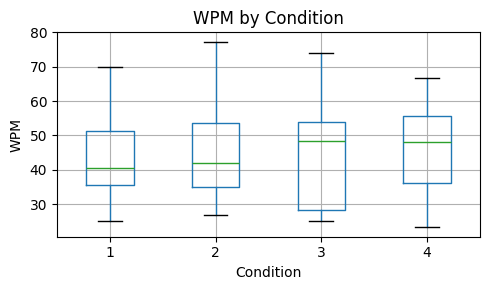

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
evjoin.boxplot([1,2,3,4], ax=ax0)#[0])
plt.title("WPM by Condition")
ax0.set_xticklabels(['B-E', 'B', 'L-E', 'L'])

ax0.set_ylabel('WPM')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.show()

In [59]:
statprint(evjoin, [1,2,3,4])

C Mean Std
1 45.09050761335682 14.414126871434101
2 46.43150639325912 14.753988184589042
3 45.682586338980286 15.857927188397367
4 45.45073611288879 13.93565481148998
-----------
ANOVA 0.0192, p=0.9963
-----------


In [362]:
# Typing speed is not statistically significantly different across any condition

In [ ]:
 ###### eye tracking #####

Experiment type 1
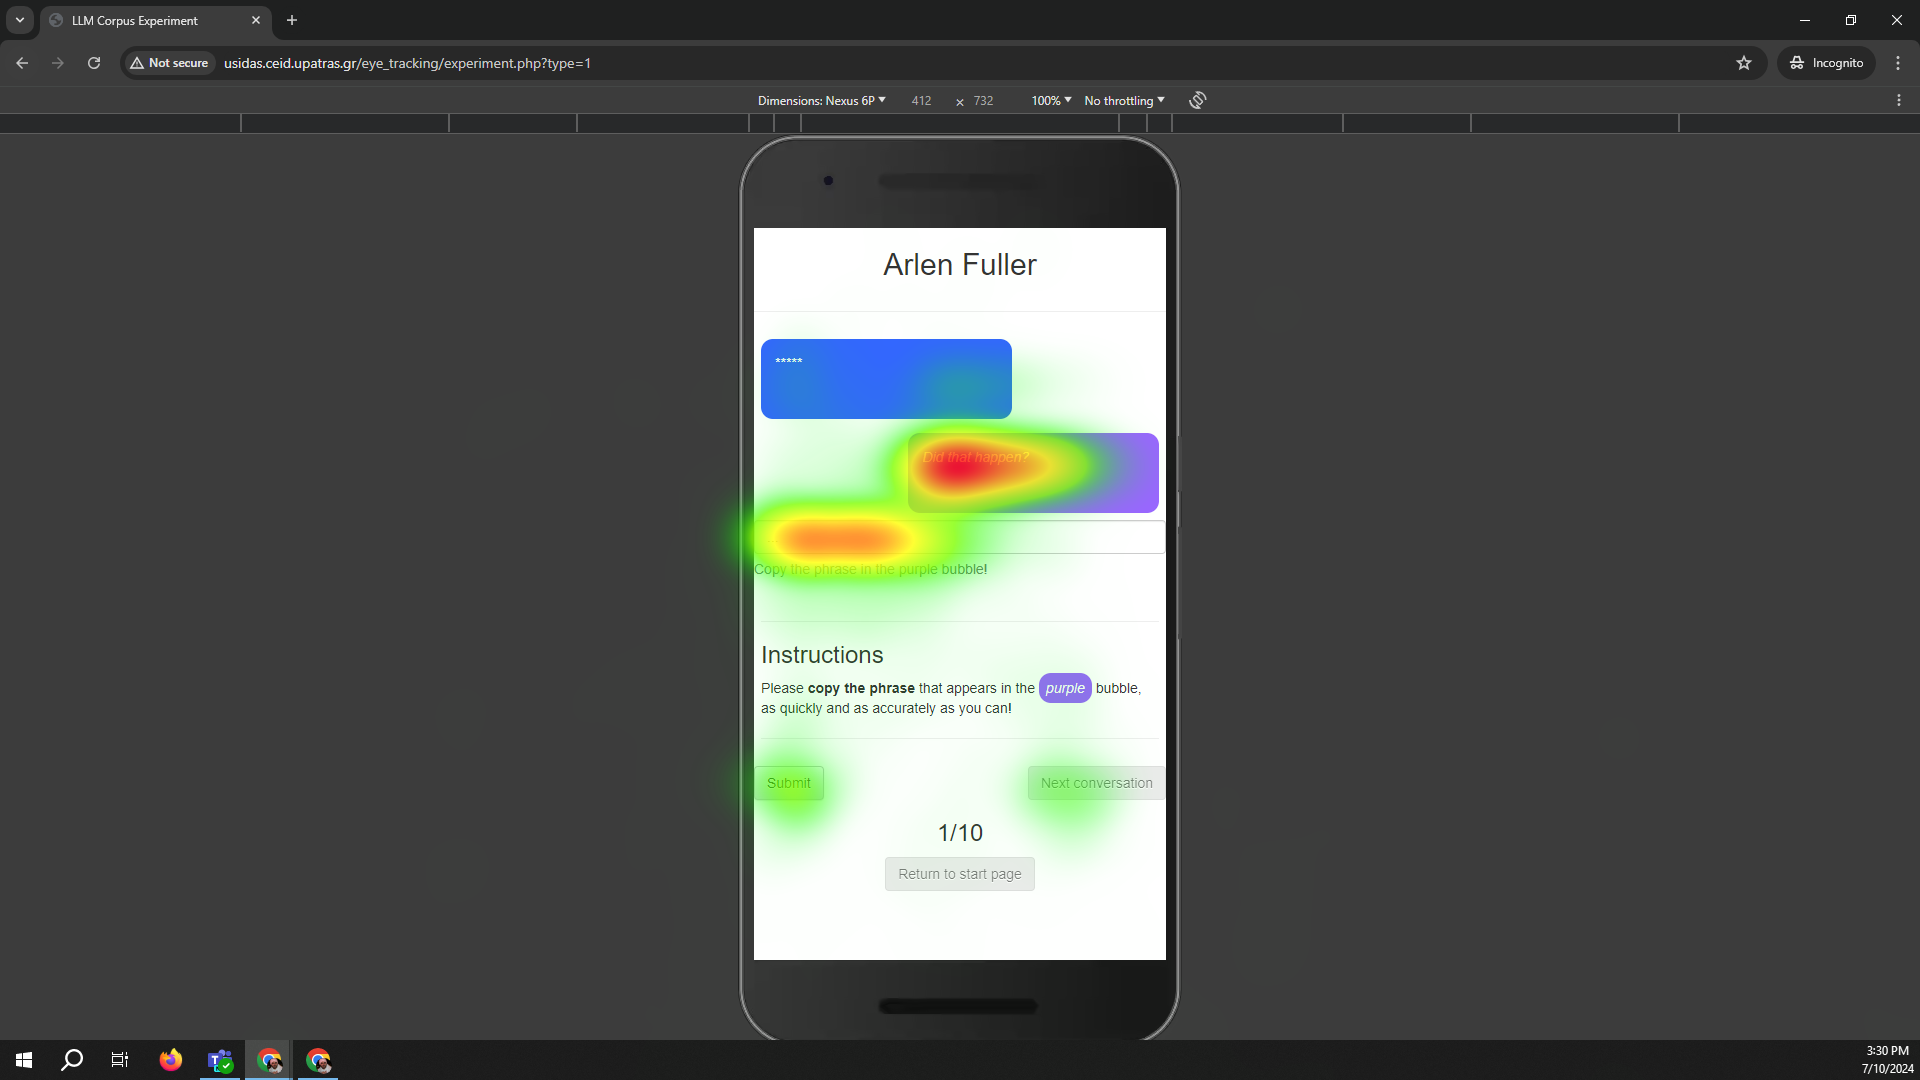

Experiment type 2
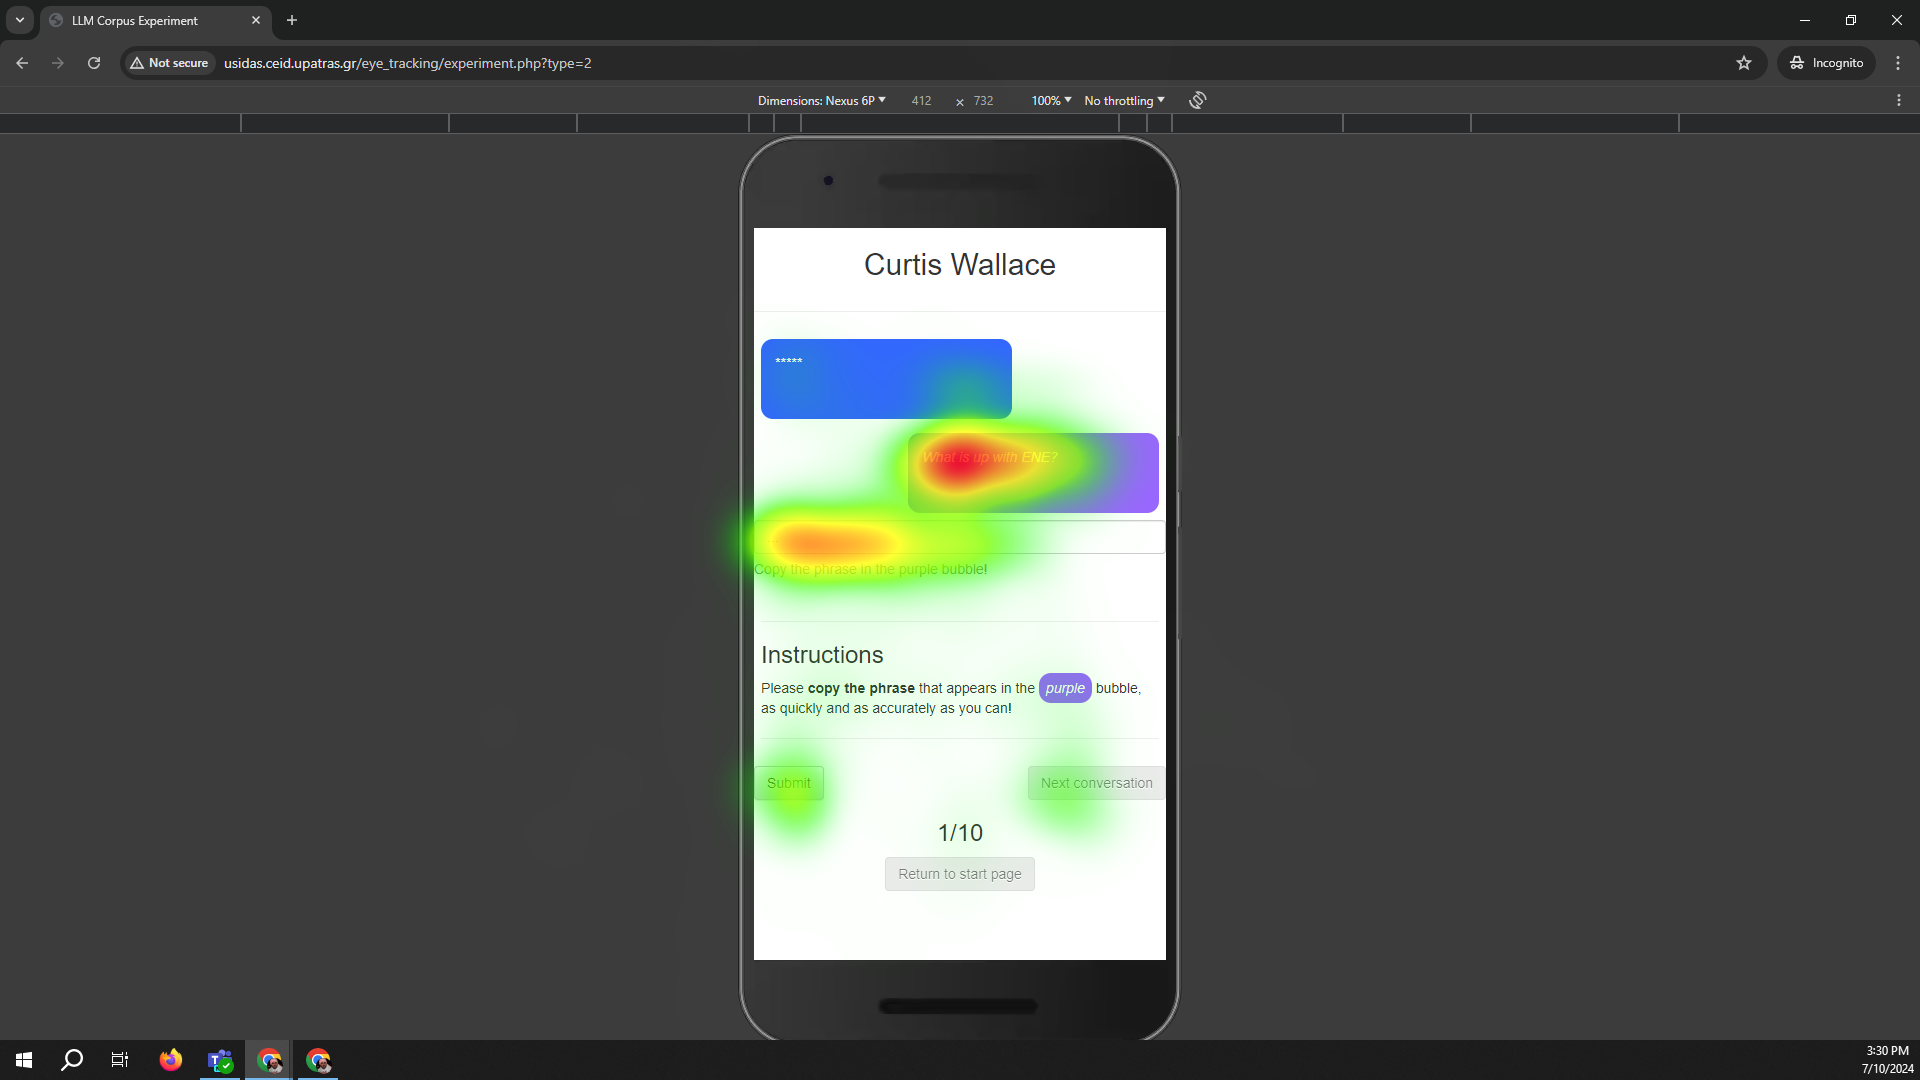


Experiment type 3
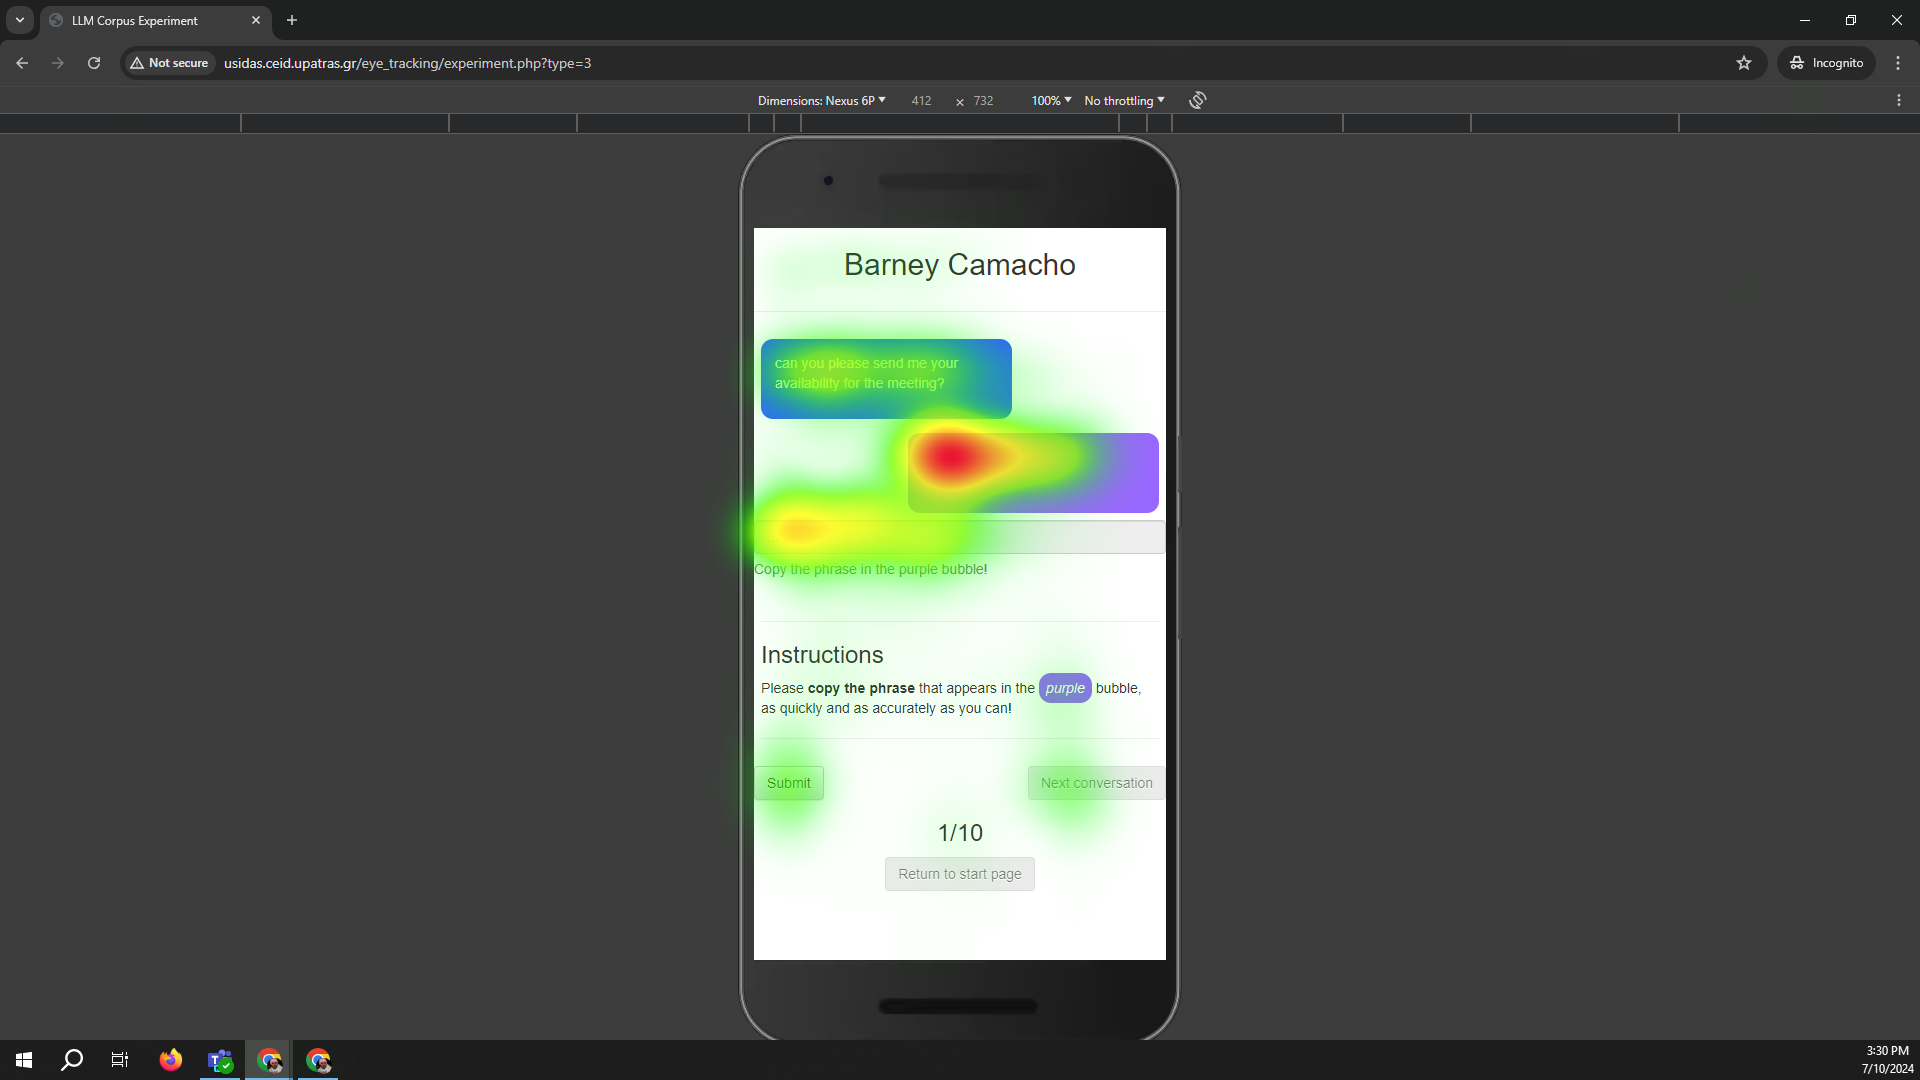

Experiment type 4
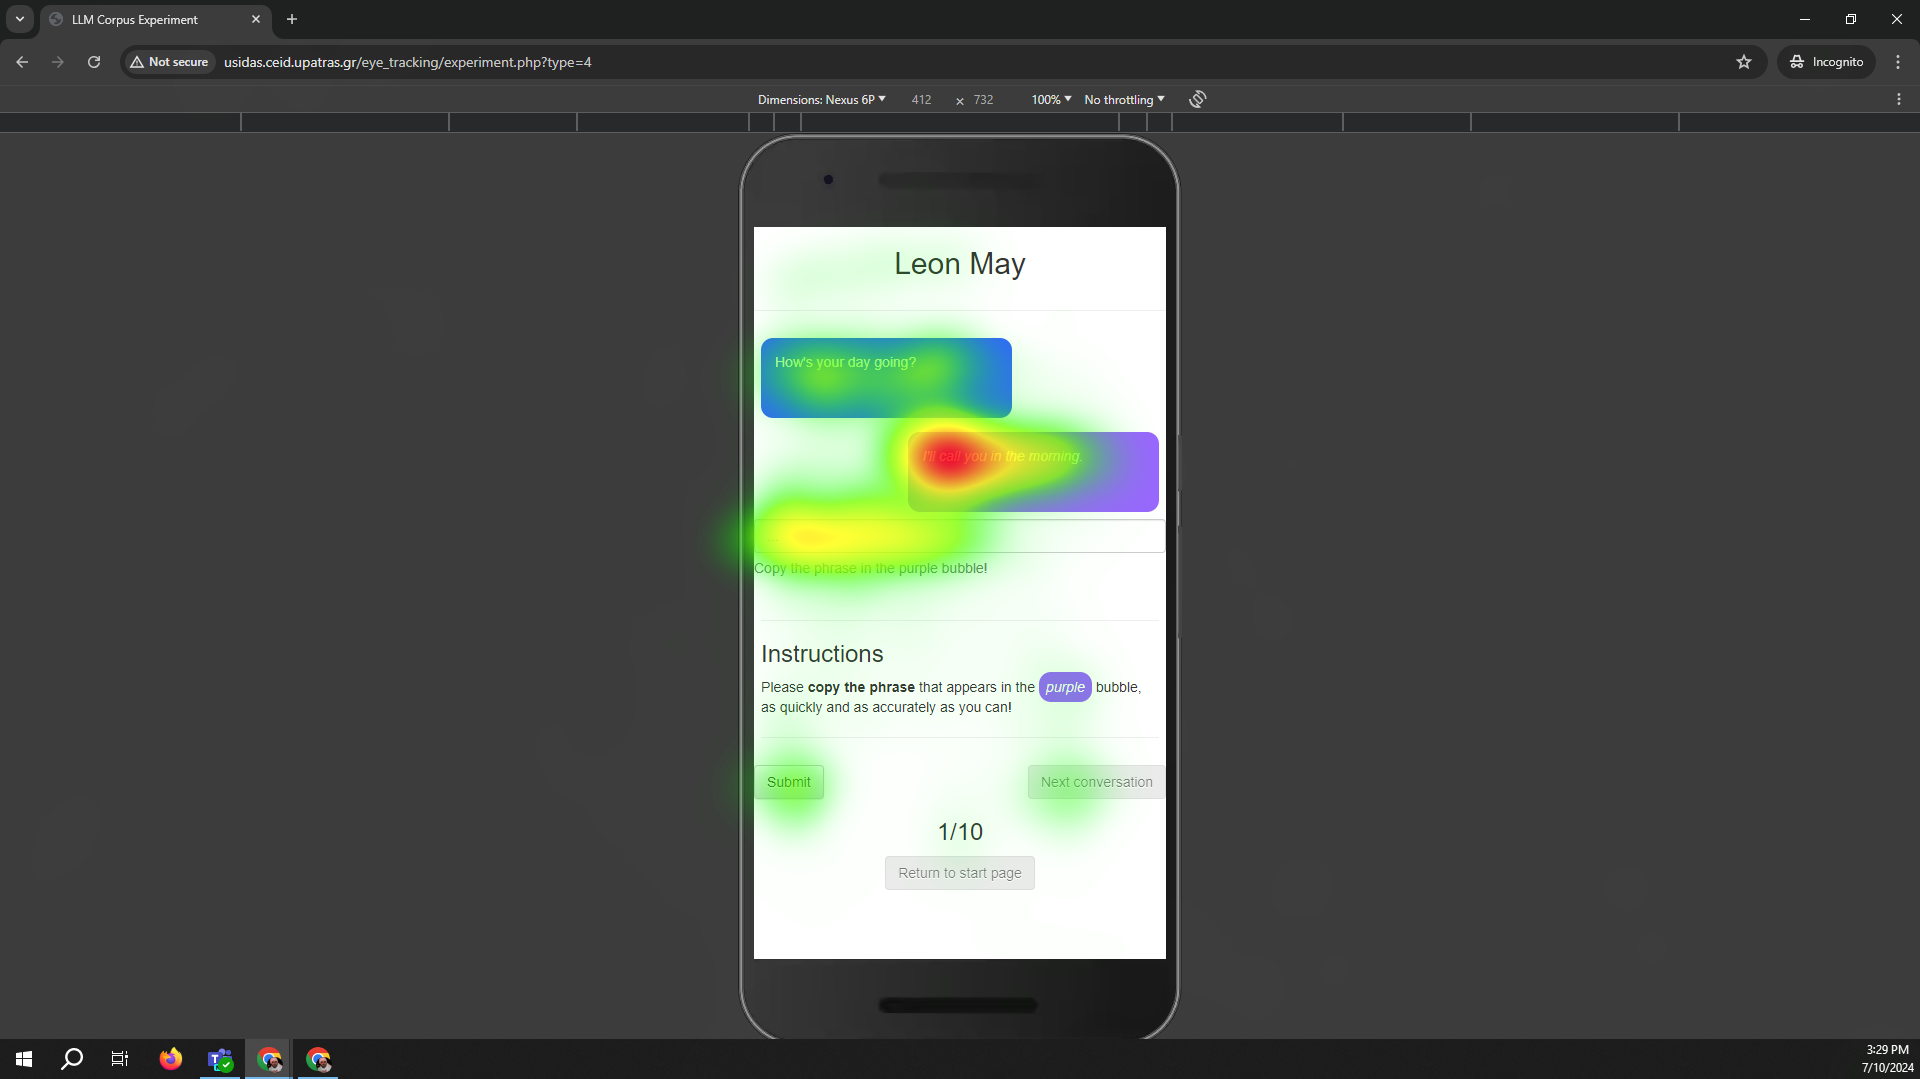

In [ ]:
### Prepare data

In [13]:
eyedf = pd.DataFrame()

In [14]:
fidur = pd.read_excel('/Users/ako2/Documents/PythonProjects/llm-corpus/eye-tracking-pilot/Komninos Metrics.xlsx',
                      sheet_name = 'Tot Fixation dur incl 0',
                         header = 1, nrows = 52)
fidur.head(5)

Total duration of fixation in AOI (including zeroes)  \
0                                               U8T1     
1                                              U11T4     
2                                               U8T4     
3                                               U2T4     
4                                               U1T3     

              Participant  Experiment Type   Blue box  Blue box.1  Blue box.2  \
0   User8_ida8cf5ca5e993a              NaN   0.000000         0.0         0.0   
1  User11_id4800804c0a8bb              NaN   0.000000         0.0         0.0   
2   User8_ida8cf5ca5e993a              NaN   0.000000         0.0         0.0   
3  User2__id88d9599e3704f              NaN   0.000000         0.0         0.0   
4  User1__id0b3b44e2cef4d              NaN  26.693426         0.0         0.0   

   Blue box.3  Blue box.4  Blue box.5  Blue box.6  ...  Purple box.47  \
0         0.0         0.0         0.0      0.0000  ...            0.0   
1         0.0         0.0         0.0      0.0000  ...            0.0   
2         0.0         0.0         0.0      0.0000  ...            0.0   
3         0.0         0.0         0.0     10.0967  ...            0.0   
4         0.0         0.0         0.0      0.0000  ...            0.0   

   Purple box.48  Purple box.49  Purple box.50  Purple box.51   Average  \
0            0.0            0.0            0.0            0.0  0.336780   
1            0.0            0.0            0.0            0.0  0.804682   
2            0.0            0.0            0.0            0.0  0.616012   
3            0.0            0.0            0.0            0.0  0.537598   
4            0.0            0.0            0.0            0.0  0.735162   

   Median        Sum  Total Time of Interest Duration  \
0       0  35.025105                       124.400425   
1       0  83.686934                       300.230936   
2       0  64.065229                       151.360471   
3       0  55.910172                       164.410448   
4       0  76.456898                       201.708876   

   Total Recording Duration  
0                219.651020  
1                410.407005  
2                202.259228  
3                223.905952  
4                394.850400  

[5 rows x 112 columns]

In [15]:
#extract pid and extype
eyedf['pid']=fidur['Participant'].apply(lambda x: x.replace("__","_").split("_")[1])
eyedf['extype']=fidur['Total duration of fixation in AOI (including zeroes)'].apply(lambda x: x[len(x)-1])
eyedf['extype'] = eyedf["extype"].astype(int)
eyedf.head(5)

pid  extype
0  ida8cf5ca5e993a       1
1  id4800804c0a8bb       4
2  ida8cf5ca5e993a       4
3  id88d9599e3704f       4
4  id0b3b44e2cef4d       3

In [16]:
bluekeys = []
purplekeys = []
for k in list(fidur.keys()):
    if "Blue" in k:
        bluekeys.append(k)
    if "Purple" in k:
        purplekeys.append(k)
print (bluekeys)

['Blue box', 'Blue box.1', 'Blue box.2', 'Blue box.3', 'Blue box.4', 'Blue box.5', 'Blue box.6', 'Blue box.7', 'Blue box.8', 'Blue box.9', 'Blue box.10', 'Blue box.11', 'Blue box.12', 'Blue box.13', 'Blue box.14', 'Blue box.15', 'Blue box.16', 'Blue box.17', 'Blue box.18', 'Blue box.19', 'Blue box.20', 'Blue box.21', 'Blue box.22', 'Blue box.23', 'Blue box.24', 'Blue box.25', 'Blue box.26', 'Blue box.27', 'Blue box.28', 'Blue box.29', 'Blue box.30', 'Blue box.31', 'Blue box.32', 'Blue box.33', 'Blue box.34', 'Blue box.35', 'Blue box.36', 'Blue box.37', 'Blue box.38', 'Blue box.39', 'Blue box.40', 'Blue box.41', 'Blue box.42', 'Blue box.43', 'Blue box.44', 'Blue box.45', 'Blue box.46', 'Blue box.47', 'Blue box.48', 'Blue box.49', 'Blue box.50', 'Blue box.51']


In [17]:
eyedf['blue_fixdur'] = fidur[bluekeys].sum(axis=1)
eyedf['purple_fixdur'] = fidur[purplekeys].sum(axis=1)
eyedf.head(5)

pid  extype  blue_fixdur  purple_fixdur
0  ida8cf5ca5e993a       1     0.533334      34.491771
1  id4800804c0a8bb       4    14.013369      69.673565
2  ida8cf5ca5e993a       4     9.008368      55.056861
3  id88d9599e3704f       4    10.096700      45.813472
4  id0b3b44e2cef4d       3    26.693426      49.763472

In [18]:
fidur = pd.read_excel('/Users/ako2/Documents/PythonProjects/llm-corpus/eye-tracking-pilot/Komninos Metrics.xlsx',
                      sheet_name = 'Fixation count incl 0',
                         header = 1, nrows = 52)
eyedf['blue_totalfix'] = fidur[bluekeys].sum(axis=1)
eyedf['purple_totalfix'] = fidur[purplekeys].sum(axis=1)

fidur = pd.read_excel('/Users/ako2/Documents/PythonProjects/llm-corpus/eye-tracking-pilot/Komninos Metrics.xlsx',
                      sheet_name = 'Time to first Fixation',
                         header = 1, nrows = 52)
eyedf['blue_timetofix'] = fidur[bluekeys].sum(axis=1)
eyedf['purple_timetofix'] = fidur[purplekeys].sum(axis=1)

fidur = pd.read_excel('/Users/ako2/Documents/PythonProjects/llm-corpus/eye-tracking-pilot/Komninos Metrics.xlsx',
                      sheet_name = 'Tot Visit dur incl 0',
                         header = 1, nrows = 52)
eyedf['blue_visitdur'] = fidur[bluekeys].sum(axis=1)
eyedf['purple_visitdur'] = fidur[purplekeys].sum(axis=1)

fidur = pd.read_excel('/Users/ako2/Documents/PythonProjects/llm-corpus/eye-tracking-pilot/Komninos Metrics.xlsx',
                      sheet_name = 'Visit count incl 0',
                         header = 1, nrows = 52)
eyedf['blue_totalvisit'] = fidur[bluekeys].sum(axis=1)
eyedf['purple_totalvisit'] = fidur[purplekeys].sum(axis=1)

eyedf.head(5)

pid  extype  blue_fixdur  purple_fixdur  blue_totalfix  \
0  ida8cf5ca5e993a       1     0.533334      34.491771              3   
1  id4800804c0a8bb       4    14.013369      69.673565             42   
2  ida8cf5ca5e993a       4     9.008368      55.056861             38   
3  id88d9599e3704f       4    10.096700      45.813472             40   
4  id0b3b44e2cef4d       3    26.693426      49.763472             97   

   purple_totalfix  blue_timetofix  purple_timetofix  blue_visitdur  \
0              106        0.425005          1.428341       0.533334   
1              186        0.133333          0.433333      14.470034   
2              153        0.000000          2.355005       9.411704   
3              157        0.000000          1.710005      11.106701   
4              174        0.193334          0.590003      28.666753   

   purple_visitdur  blue_totalvisit  purple_totalvisit  
0        35.831778                3                 33  
1        81.586926               20                 58  
2        57.473532               21                 37  
3        51.460153               14                 46  
4        62.773503               21                 46

In [19]:
### Data ready, now test ####

In [20]:
# Do they spend any time examining the prompt phrase? Fixation duration in blue bubble
testdf=eyedf[['pid','extype','blue_fixdur']].pivot(index='pid', columns ='extype', values='blue_fixdur')
testdf.reset_index(inplace=True)
testdf.head(5)

extype              pid         1         2          3          4
0       id0b3b44e2cef4d  0.383335  0.079999  26.693426  30.493420
1       id0bdef54858cd3  3.043341  4.288349  22.781737  21.758401
2       id15d11dd8fd8aa  0.183333  0.360000   8.790021  17.153370
3       id1d7694116bf3a  0.846669  0.223333  10.650020   8.253355
4       id3d3533f2ad9f7  1.796667  2.370003  47.763465  36.203423

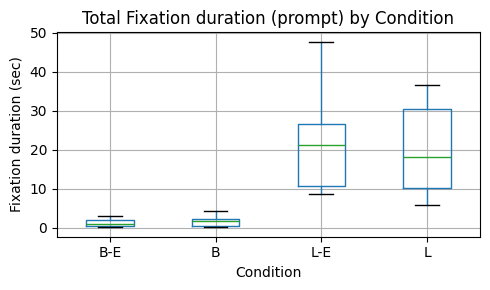

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
testdf.boxplot([1,2,3,4], ax=ax0)#[0])
plt.title("Total Fixation duration (prompt) by Condition")
ax0.set_xticklabels(['B-E', 'B', 'L-E', 'L'])

ax0.set_ylabel('Fixation duration (sec)')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.savefig("pngs/total_fix_dur_prompt.png")
plt.show()

In [22]:
statprint(testdf, [1,2,3,4])

C Mean Std
1 1.3420545384615383 0.9765773059707575
2 1.5511580769230768 1.2355367359711504
3 21.391216384615383 11.859602184610004
4 20.466469076923076 10.915992095447933
-----------
ANOVA 25.1127, p=0.0
-----------
T-test (1, 2): -0.6504, p=0.5277
T-test (1, 3): -6.3141, p=0.0 *
T-test (1, 4): -6.422, p=0.0 *
T-test (2, 3): -6.139, p=0.0001 *
T-test (2, 4): -6.2484, p=0.0 *
T-test (3, 4): 0.5946, p=0.5631
bf-adj p: 0.0083

                #    Experiments:
                
                #    1 - no prompt typewriter
                #    2 - no prompt all
                #    3 - prompt typewriter
                #    4 - prompt all
                


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [23]:
# fixation duration in prompt phrase is greater in prompt conditions, both with typewriter (1-3) and without (2-4). 
# Typewriter doesn't have an impact within the same condition group (prompt, no prompt).

In [24]:
# Do they spend any time examining the prompt phrase? Total fixations in blue bubble
testdf=eyedf[['pid','extype','blue_totalfix']].pivot(index='pid', columns ='extype', values='blue_totalfix')
testdf.reset_index(inplace=True)
testdf.head(5)

extype              pid   1   2    3    4
0       id0b3b44e2cef4d   3   1   97   95
1       id0bdef54858cd3  12  16   93   83
2       id15d11dd8fd8aa   1   2   28   70
3       id1d7694116bf3a   6   2   54   42
4       id3d3533f2ad9f7   8  13  184  128

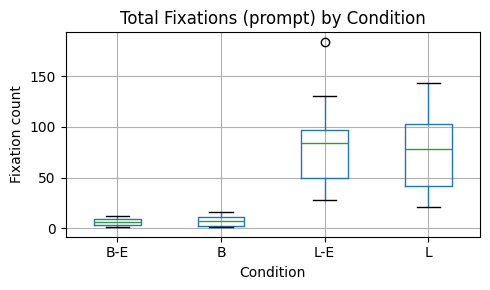

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
testdf.boxplot([1,2,3,4], ax=ax0)#[0])
plt.title("Total Fixations (prompt) by Condition")
ax0.set_xticklabels(['B-E', 'B', 'L-E', 'L'])

ax0.set_ylabel('Fixation count')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.savefig("pngs/total_fix_prompt.png")

plt.show()

In [27]:
statprint(testdf, [1,2,3,4])

C Mean Std
1 5.846153846153846 3.804518231571374
2 6.923076923076923 5.040858697707803
3 82.0 44.72694937059759
4 76.23076923076923 38.15790404392831
-----------
ANOVA 26.3092, p=0.0
-----------
T-test (1, 2): -0.7678, p=0.4575
T-test (1, 3): -6.349, p=0.0 *
T-test (1, 4): -6.747, p=0.0 *
T-test (2, 3): -6.3205, p=0.0 *
T-test (2, 4): -6.7138, p=0.0 *
T-test (3, 4): 0.8954, p=0.3882
bf-adj p: 0.0083

                #    Experiments:
                
                #    1 - no prompt typewriter
                #    2 - no prompt all
                #    3 - prompt typewriter
                #    4 - prompt all
                


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [28]:
# fixation count in prompt phrase is greater in prompt conditions, both with typewriter (1-3) and without (2-4). 
# Typewriter doesn't have an impact within the same condition (prompt, no prompt).

In [29]:
# In which condition is the fixation duration more for the response bubble? (reading intensely)
testdf=eyedf[['pid','extype','purple_fixdur']].pivot(index='pid', columns ='extype', values='purple_fixdur')
testdf.reset_index(inplace=True)
testdf.head(5)

extype              pid          1          2          3          4
0       id0b3b44e2cef4d  34.526767  36.126749  49.763472  43.586796
1       id0bdef54858cd3  45.665133  54.440189  46.150157  51.203504
2       id15d11dd8fd8aa  23.928373  21.333346  47.316763  37.680084
3       id1d7694116bf3a  29.610055  32.153373  34.116739  42.013401
4       id3d3533f2ad9f7  59.013449  48.528476  60.608487  72.940189

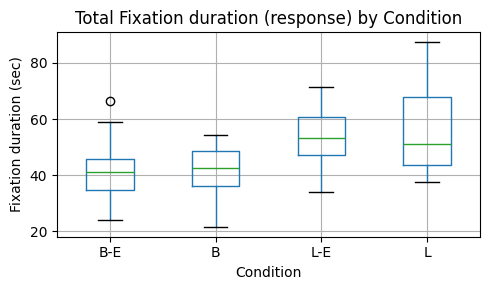

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
testdf.boxplot([1,2,3,4], ax=ax0)#[0])
plt.title("Total Fixation duration (response) by Condition")
ax0.set_xticklabels(['B-E', 'B', 'L-E', 'L'])

ax0.set_ylabel('Fixation duration (sec)')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.savefig("pngs/total_fix_dur_response.png")

plt.show()

In [32]:
statprint(testdf, [1,2,3,4])

C Mean Std
1 41.35241792307692 11.52804929384997
2 41.07370153846154 9.51071662736699
3 53.38565223076924 10.70905009777709
4 54.89220692307692 15.36097666716248
-----------
ANOVA 5.0808, p=0.0039
-----------
T-test (1, 2): 0.0998, p=0.9221
T-test (1, 3): -3.4504, p=0.0048 *
T-test (1, 4): -6.2763, p=0.0 *
T-test (2, 3): -4.7034, p=0.0005 *
T-test (2, 4): -3.8045, p=0.0025 *
T-test (3, 4): -0.4222, p=0.6803
bf-adj p: 0.0083

                #    Experiments:
                
                #    1 - no prompt typewriter
                #    2 - no prompt all
                #    3 - prompt typewriter
                #    4 - prompt all
                


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
# fixation duration in response phrase is greater in prompt conditions, both with typewriter (1-3) and without (2-4). 
# Typewriter doesn't have an impact within the same condition (prompt, no prompt).

In [34]:
# In which condition do they have more fixations on the response phrase?
testdf=eyedf[['pid','extype','purple_totalfix']].pivot(index='pid', columns ='extype', values='purple_totalfix')
testdf.reset_index(inplace=True)
testdf.head(5)

extype              pid    1    2    3    4
0       id0b3b44e2cef4d  105  101  174  105
1       id0bdef54858cd3  151  203  156  162
2       id15d11dd8fd8aa   71   75  124  129
3       id1d7694116bf3a  104  107  141  162
4       id3d3533f2ad9f7  183  166  225  227

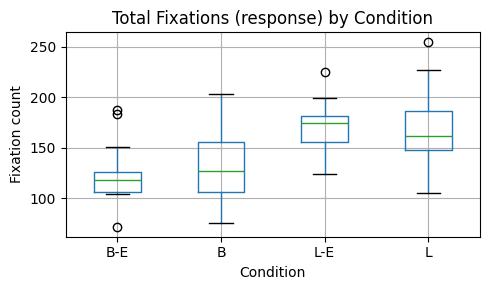

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
testdf.boxplot([1,2,3,4], ax=ax0)#[0])
plt.title("Total Fixations (response) by Condition")
ax0.set_xticklabels(['B-E', 'B', 'L-E', 'L'])

ax0.set_ylabel('Fixation count')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.savefig("pngs/total_fix_response.png")
plt.show()

In [36]:
statprint(testdf, [1,2,3,4])

C Mean Std
1 124.23076923076923 32.28300338711236
2 131.3846153846154 35.843498856227896
3 169.53846153846155 27.24767691815024
4 169.30769230769232 40.20651816017028
-----------
ANOVA 6.5008, p=0.0009
-----------
T-test (1, 2): -0.7041, p=0.4948
T-test (1, 3): -5.1826, p=0.0002 *
T-test (1, 4): -6.6458, p=0.0 *
T-test (2, 3): -4.5346, p=0.0007 *
T-test (2, 4): -2.8915, p=0.0135
T-test (3, 4): 0.0212, p=0.9835
bf-adj p: 0.0083

                #    Experiments:
                
                #    1 - no prompt typewriter
                #    2 - no prompt all
                #    3 - prompt typewriter
                #    4 - prompt all
                


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [37]:
# fixation count in response phrase is greater in prompt conditions with typewriter (1-3) but not without (2-4). 
# Typewriter doesn't have an impact within the same condition (prompt, no prompt).

In [38]:
# In which condition do they take longer to fixate on the response phrase?
testdf=eyedf[['pid','extype','purple_timetofix']].pivot(index='pid', columns ='extype', values='purple_timetofix')
testdf.reset_index(inplace=True)
testdf.head(5)

extype              pid         1         2         3         4
0       id0b3b44e2cef4d  0.231668  0.106666  0.590003  4.743346
1       id0bdef54858cd3  0.205000  1.121668  1.151668  1.798337
2       id15d11dd8fd8aa  0.000000  0.116666  0.773335  0.823335
3       id1d7694116bf3a  0.000000  4.853337  0.000000  0.118334
4       id3d3533f2ad9f7  0.000000  0.000000  0.000000  3.003338

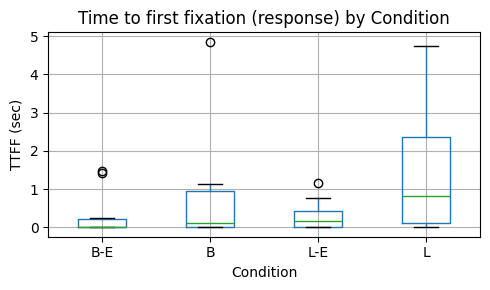

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
testdf.boxplot([1,2,3,4], ax=ax0)#[0])
plt.title("Time to first fixation (response) by Condition")
ax0.set_xticklabels(['B-E', 'B', 'L-E', 'L'])

ax0.set_ylabel('TTFF (sec)')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.savefig("pngs/ttff_response.png")
plt.show()

In [40]:
statprint(testdf, [1,2,3,4])

C Mean Std
1 0.28884769230769236 0.5250758255390969
2 0.696411076923077 1.3215920757188695
3 0.28115461538461545 0.3604757915946041
4 1.4185933076923076 1.5526906241486307
-----------
FRIEDMAN 5.9732, p=0.1129
-----------


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [41]:
# Time to first fixation is not statistically significantly different across conditions

In [42]:
# How much time do they spend looking at prompt and response bubbles in each condition?
testdf=eyedf[['pid','extype','blue_fixdur','purple_fixdur']].pivot(index='pid', columns ='extype', values=['blue_fixdur','purple_fixdur'])
testdf.reset_index(inplace=True)
testdf.head(5)

pid blue_fixdur                                  \
extype                            1         2          3          4   
0       id0b3b44e2cef4d    0.383335  0.079999  26.693426  30.493420   
1       id0bdef54858cd3    3.043341  4.288349  22.781737  21.758401   
2       id15d11dd8fd8aa    0.183333  0.360000   8.790021  17.153370   
3       id1d7694116bf3a    0.846669  0.223333  10.650020   8.253355   
4       id3d3533f2ad9f7    1.796667  2.370003  47.763465  36.203423   

       purple_fixdur                                   
extype             1          2          3          4  
0          34.526767  36.126749  49.763472  43.586796  
1          45.665133  54.440189  46.150157  51.203504  
2          23.928373  21.333346  47.316763  37.680084  
3          29.610055  32.153373  34.116739  42.013401  
4          59.013449  48.528476  60.608487  72.940189

In [43]:
testdf.keys()

MultiIndex([(          'pid', ''),
            (  'blue_fixdur',  1),
            (  'blue_fixdur',  2),
            (  'blue_fixdur',  3),
            (  'blue_fixdur',  4),
            ('purple_fixdur',  1),
            ('purple_fixdur',  2),
            ('purple_fixdur',  3),
            ('purple_fixdur',  4)],
           names=[None, 'extype'])

In [44]:
testdf.columns = [column[0]+"_"+str(column[1]) for column in testdf.columns.to_flat_index()]
testdf.head(5)

pid_  blue_fixdur_1  blue_fixdur_2  blue_fixdur_3  \
0  id0b3b44e2cef4d       0.383335       0.079999      26.693426   
1  id0bdef54858cd3       3.043341       4.288349      22.781737   
2  id15d11dd8fd8aa       0.183333       0.360000       8.790021   
3  id1d7694116bf3a       0.846669       0.223333      10.650020   
4  id3d3533f2ad9f7       1.796667       2.370003      47.763465   

   blue_fixdur_4  purple_fixdur_1  purple_fixdur_2  purple_fixdur_3  \
0      30.493420        34.526767        36.126749        49.763472   
1      21.758401        45.665133        54.440189        46.150157   
2      17.153370        23.928373        21.333346        47.316763   
3       8.253355        29.610055        32.153373        34.116739   
4      36.203423        59.013449        48.528476        60.608487   

   purple_fixdur_4  
0        43.586796  
1        51.203504  
2        37.680084  
3        42.013401  
4        72.940189

In [47]:
for i in range(1,5):
    testdf['prompt_'+str(i)] = testdf['blue_fixdur_'+str(i)] / (testdf['blue_fixdur_'+str(i)] +testdf['purple_fixdur_'+str(i)])
testdf.head(5)

pid_  blue_fixdur_1  blue_fixdur_2  blue_fixdur_3  \
0  id0b3b44e2cef4d       0.383335       0.079999      26.693426   
1  id0bdef54858cd3       3.043341       4.288349      22.781737   
2  id15d11dd8fd8aa       0.183333       0.360000       8.790021   
3  id1d7694116bf3a       0.846669       0.223333      10.650020   
4  id3d3533f2ad9f7       1.796667       2.370003      47.763465   

   blue_fixdur_4  purple_fixdur_1  purple_fixdur_2  purple_fixdur_3  \
0      30.493420        34.526767        36.126749        49.763472   
1      21.758401        45.665133        54.440189        46.150157   
2      17.153370        23.928373        21.333346        47.316763   
3       8.253355        29.610055        32.153373        34.116739   
4      36.203423        59.013449        48.528476        60.608487   

   purple_fixdur_4  prompt_1  prompt_2  prompt_3  prompt_4  
0        43.586796  0.010981  0.002210  0.349130  0.411627  
1        51.203504  0.062481  0.073020  0.330496  0.298216  
2        37.680084  0.007603  0.016595  0.156666  0.312827  
3        42.013401  0.027799  0.006898  0.237900  0.164191  
4        72.940189  0.029546  0.046563  0.440736  0.331704

In [48]:
keys = list(testdf.keys())[9:]
print(keys)

['prompt_1', 'prompt_2', 'prompt_3', 'prompt_4']


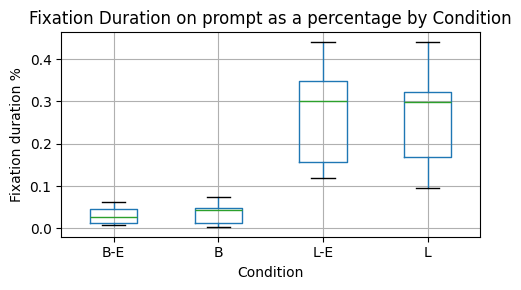

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
#ax0, ax1, ax2, ax3 = axes.flatten()
ax0=axes
testdf.boxplot(keys, ax=ax0)#[0])
plt.title("Fixation Duration on prompt as a percentage by Condition")
ax0.set_xticklabels(['B-E', 'B', 'L-E', 'L'])

ax0.set_ylabel('Fixation duration %')
ax0.set_xlabel('Condition')
plt.tight_layout()
plt.savefig("pngs/fix_dur_prompt_pct.png")

plt.show()

In [50]:
statprint(testdf, keys)

C Mean Std
prompt_1 0.029462706757432698 0.018450065263631767
prompt_2 0.033874693231677064 0.022875340551094015
prompt_3 0.2752597312460642 0.10885468322186515
prompt_4 0.26293439435492977 0.107152300946614
-----------
ANOVA 40.4471, p=0.0
-----------
T-test (prompt_1, prompt_2): -0.6928, p=0.5016
T-test (prompt_1, prompt_3): -8.5089, p=0.0 *
T-test (prompt_1, prompt_4): -7.7015, p=0.0 *
T-test (prompt_2, prompt_3): -8.1943, p=0.0 *
T-test (prompt_2, prompt_4): -7.5474, p=0.0 *
T-test (prompt_3, prompt_4): 0.5551, p=0.589
bf-adj p: 0.0083

                #    Experiments:
                
                #    1 - no prompt typewriter
                #    2 - no prompt all
                #    3 - prompt typewriter
                #    4 - prompt all
                


/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Users spend about 30% of their attention on the prompt bubble part of the stimulus area, when a prompt appears.
# Compared to 3% when the prompt doesn't appear.
# The difference is not statistically significant in the prompt appearance case, for the typewriter effect.